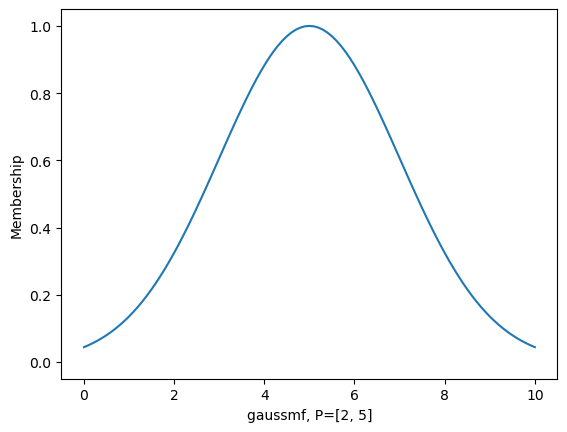

In [1]:
import fuzlab as fl
import matplotlib.pyplot as plt

x = fl.arange(0, 0.1, 10)
y = fl.gaussmf(x, [2, 5])

plt.plot(x, y)
plt.xlabel('gaussmf, P=[2, 5]')
plt.ylabel('Membership')
plt.ylim([-0.05, 1.05])
plt.show()


In [2]:
import fuzlab as fl
import numpy as np

# Construct the Mamdani type fuzzy inference system

fis = fl.mamfis()

# defuzzification methods: 'som', 'mom','lom','centroid','bisector','wtaver'='centroid','wabl'
fis.DefuzzificationMethod = 'centroid' 

# Define input for "Year"

fis.addInput([0, 50], Name='Year')
fis.addMF('Year','trapmf', [0,0,5,10], Name='new')
fis.addMF('Year','trimf', [5,10,20], Name='normal')
fis.addMF('Year','trapmf', [10,20,50,50], Name='old')


# Define input for "Km"

fis.addInput([0, 1000000], Name='Km')
fis.addMF('Km','trapmf',[    0,0, 50000, 150000],Name='low')
fis.addMF('Km','trimf',[50000, 150000, 250000],Name='normal')
fis.addMF('Km','trapmf',[150000, 250000, 1000000,1000000],Name='high')

# Define output for "Price"

fis.addOutput([0, 100000], Name='Price')
fis.addMF('Price','trapmf',[0, 0,5000, 10000],Name='very_cheap')
fis.addMF('Price','trimf',[5000, 10000, 20000],Name='cheap')
fis.addMF('Price','trimf',[10000, 20000, 30000],Name='normal')
fis.addMF('Price','trimf',[20000, 30000, 50000],Name='expensive')
fis.addMF('Price','trapmf',[30000, 50000, 100000,100000],Name='very_expensive')


# Define the following fuzzy rules:

# 1 If 'Year' is 'new' and 'Km' is 'low', then 'Price' is 'very_expensive'. Weight = 1, Connection = 1 (AND).
# 2 If 'Year' is 'new' and 'Km' is 'normal', then 'Price' is 'expensive'. Weight = 1, Connection = 1 (AND).
# 3 If 'Year' is 'new' and 'Km' is 'high', then 'Price' is 'normal'. Weight = 1, Connection = 1 (AND).
# 4 If 'Year' is 'normal' and 'Km' is 'low', then 'Price' is 'normal'. Weight = 1, Connection = 1 (AND).
# 5 If 'Year' is 'normal' and 'Km' is 'normal', then 'Price' is 'normal'. Weight = 1, Connection = 1 (AND).
# 6 If 'Year' is 'normal' and 'Km' is 'high', then 'Price' is 'cheap'. Weight = 1, Connection = 1 (AND).
# 7 If 'Year' is 'old' and 'Km' is 'low', then 'Price' is 'cheap'. Weight = 1, Connection = 1 (AND).
# 8 If 'Year' is 'old' and 'Km' is 'normal', then 'Price' is 'cheap'. Weight = 1, Connection = 1 (AND).
# 9 If 'Year' is 'old' and 'Km' is 'high', then 'Price' is 'very_cheap'. Weight = 1, Connection = 1 (AND).

ruleList = [[1, 1, 5, 1, 1], # Rule 1
            [1, 2, 4, 1, 1], # Rule 2
            [1, 3, 3, 1, 1], # Rule 3
            [2, 1, 3, 1, 1], # Rule 4
            [2, 2, 3, 1, 1], # Rule 5     
            [2, 3, 2, 1, 1], # Rule 6
            [3, 1, 2, 1, 1], # Rule 7
            [3, 2, 2, 1, 1], # Rule 8
            [3, 3, 1, 1, 1]] # Rule 9

fis.addRule(ruleList)
outMam = fl.evalfis(fis,[7, 90000],rule_firing = True)
print(outMam)


(59808.42105263148, array([0.6, 0.4, 0. , 0.4, 0.4, 0. , 0. , 0. , 0. ]))


In [3]:
import fuzlab as fl
import numpy as np

# Construct the Mamdani FIS-RBD type fuzzy inference system

fisRBD = fl.mamfisRBD()

# defuzzification methods: 'som', 'mom','lom','centroid','bisector','wtaver'='centroid','wabl'
fisRBD.DefuzzificationMethod = 'wabl' 
fisRBD.WablOptimizm          = 0.7 
fisRBD.WablDegrees           = 21
fisRBD.WablImportances       = np.ones(fisRBD.WablDegrees)
#fisRBD.WablImportances       = [2*i for i in range(fisRBD.WablDegrees)] 

# Define input for "Year"

fisRBD.addInput([0, 50], Name='Year')
fisRBD.addMF('Year','trapmf', [0,0,5,10], Name='new')
fisRBD.addMF('Year','trimf', [5,10,20], Name='normal')
fisRBD.addMF('Year','trapmf', [10,20,50,50], Name='old')


# Define input for "Km"

fisRBD.addInput([0, 1000000], Name='Km')
fisRBD.addMF('Km','trapmf',[    0,0, 50000, 150000],Name='low')
fisRBD.addMF('Km','trimf',[50000, 150000, 250000],Name='normal')
fisRBD.addMF('Km','trapmf',[150000, 250000, 1000000,1000000],Name='high')

# Define output for "Price"

fisRBD.addOutput([0, 100000], Name='Price')
fisRBD.addMF('Price','trapmf',[0, 0,5000, 10000],Name='very_cheap')
fisRBD.addMF('Price','trimf',[5000, 10000, 20000],Name='cheap')
fisRBD.addMF('Price','trimf',[10000, 20000, 30000],Name='normal')
fisRBD.addMF('Price','trimf',[20000, 30000, 50000],Name='expensive')
fisRBD.addMF('Price','trapmf',[30000, 50000, 100000,100000],Name='very_expensive')


# Define the following fuzzy rules:

# 1 If 'Year' is 'new' and 'Km' is 'low', then 'Price' is 'very_expensive'. Weight = 1, Connection = 1 (AND).
# 2 If 'Year' is 'new' and 'Km' is 'normal', then 'Price' is 'expensive'. Weight = 1, Connection = 1 (AND).
# 3 If 'Year' is 'new' and 'Km' is 'high', then 'Price' is 'normal'. Weight = 1, Connection = 1 (AND).
# 4 If 'Year' is 'normal' and 'Km' is 'low', then 'Price' is 'normal'. Weight = 1, Connection = 1 (AND).
# 5 If 'Year' is 'normal' and 'Km' is 'normal', then 'Price' is 'normal'. Weight = 1, Connection = 1 (AND).
# 6 If 'Year' is 'normal' and 'Km' is 'high', then 'Price' is 'cheap'. Weight = 1, Connection = 1 (AND).
# 7 If 'Year' is 'old' and 'Km' is 'low', then 'Price' is 'cheap'. Weight = 1, Connection = 1 (AND).
# 8 If 'Year' is 'old' and 'Km' is 'normal', then 'Price' is 'cheap'. Weight = 1, Connection = 1 (AND).
# 9 If 'Year' is 'old' and 'Km' is 'high', then 'Price' is 'very_cheap'. Weight = 1, Connection = 1 (AND).

ruleList = [[1, 1, 5, 1, 1], # Rule 1
            [1, 2, 4, 1, 1], # Rule 2
            [1, 3, 3, 1, 1], # Rule 3
            [2, 1, 3, 1, 1], # Rule 4
            [2, 2, 3, 1, 1], # Rule 5     
            [2, 3, 2, 1, 1], # Rule 6
            [3, 1, 2, 1, 1], # Rule 7
            [3, 2, 2, 1, 1], # Rule 8
            [3, 3, 1, 1, 1]] # Rule 9

fisRBD.addRule(ruleList)
outRBD = fl.evalfis(fisRBD,[7, 90000],rule_firing = True)
print(outRBD)
print("Optimizm = ",fisRBD.WablOptimizm)
print("Degrees = ",fisRBD.WablDegrees)
print("Importances = ",fisRBD.WablImportances)


(48490.432098765436, array([0.6, 0.4, 0. , 0.4, 0.4, 0. , 0. , 0. , 0. ]))
Optimizm =  0.7
Degrees =  21
Importances =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
import fuzlab as fl
import numpy as np

# Construct the Sugeno type fuzzy inference system

fisSug = fl.sugfis()


# Define input for "Year"

fisSug.addInput([0, 50], Name='Year')
fisSug.addMF('Year','trapmf', [0,0,5,10], Name='new')
fisSug.addMF('Year','trimf', [5,10,20], Name='normal')
fisSug.addMF('Year','trapmf', [10,20,50,50], Name='old')


# Define input for "Km"

fisSug.addInput([0, 1000000], Name='Km')
fisSug.addMF('Km','trapmf',[    0,0, 50000, 150000],Name='low')
fisSug.addMF('Km','trimf',[50000, 150000, 250000],Name='normal')
fisSug.addMF('Km','trapmf',[150000, 250000, 1000000,1000000],Name='high')

# Define output for "Price"

fisSug.addOutput([0, 100000], Name='Price')
fisSug.addMF('Price','constant',5000,Name='very_cheap')
fisSug.addMF('Price','constant',10000,Name='cheap')
fisSug.addMF('Price','constant',25000,Name='normal')
fisSug.addMF('Price','constant',40000,Name='expensive')
fisSug.addMF('Price','constant',70000,Name='very_expensive')


# Define the following fuzzy rules:

# 1 If 'Year' is 'new' and 'Km' is 'low', then 'Price' is 'very_expensive'. Weight = 1, Connection = 1 (AND).
# 2 If 'Year' is 'new' and 'Km' is 'normal', then 'Price' is 'expensive'. Weight = 1, Connection = 1 (AND).
# 3 If 'Year' is 'new' and 'Km' is 'high', then 'Price' is 'normal'. Weight = 1, Connection = 1 (AND).
# 4 If 'Year' is 'normal' and 'Km' is 'low', then 'Price' is 'normal'. Weight = 1, Connection = 1 (AND).
# 5 If 'Year' is 'normal' and 'Km' is 'normal', then 'Price' is 'normal'. Weight = 1, Connection = 1 (AND).
# 6 If 'Year' is 'normal' and 'Km' is 'high', then 'Price' is 'cheap'. Weight = 1, Connection = 1 (AND).
# 7 If 'Year' is 'old' and 'Km' is 'low', then 'Price' is 'cheap'. Weight = 1, Connection = 1 (AND).
# 8 If 'Year' is 'old' and 'Km' is 'normal', then 'Price' is 'cheap'. Weight = 1, Connection = 1 (AND).
# 9 If 'Year' is 'old' and 'Km' is 'high', then 'Price' is 'very_cheap'. Weight = 1, Connection = 1 (AND).

ruleList = [[1, 1, 5, 1, 1], # Rule 1
            [1, 2, 4, 1, 1], # Rule 2
            [1, 3, 3, 1, 1], # Rule 3
            [2, 1, 3, 1, 1], # Rule 4
            [2, 2, 3, 1, 1], # Rule 5     
            [2, 3, 2, 1, 1], # Rule 6
            [3, 1, 2, 1, 1], # Rule 7
            [3, 2, 2, 1, 1], # Rule 8
            [3, 3, 1, 1, 1]] # Rule 9

fisSug.addRule(ruleList)
outSug = fl.evalfis(fisSug,[7, 90000],rule_firing = True)
print(outSug)


(44800.0, array([0.36, 0.24, 0.  , 0.24, 0.16, 0.  , 0.  , 0.  , 0.  ]))
